# CrewAI CLI

**Why Use the CLI?**

*   **Automation:**  Easily run crews as part of larger automated workflows (e.g., scheduled tasks, CI/CD pipelines, flows).
*   **Headless Execution:** Run your agents on servers without a graphical interface.
*   **Debugging and Inspection:** Quickly check the status of tasks, logs, and agent interactions.
*   **Fast Iteration:**  Experiment with different crew configurations without needing to modify code directly.

## Let's start!
```bash
mkdir crew-experiments
cd crew-experiments
export OPENAI_API_KEY=your-key-here
docker pull python:3.11
docker run -it -d -v "$(pwd):/experiments" --name modern-crew-ai -e OPENAI_API_KEY python:3.11
docker exec -it modern-crew-ai bash
```

Let's understand these steps:

1.  **`mkdir crew-experiments`**: Makes a folder called "crew-experiments".
2.  **`cd crew-experiments`**: Moves you *into* that folder.
3.  **`docker pull python:3.11`**: Downloads a ready-to-use Python 3.11 environment.
4.  **`docker run -it -d -v "$(pwd):/experiments" --name modern-crew-ai -e OPENAI_API_KEY python:3.11`**

    * `docker run` is the command that creates and starts a new Docker container.
    * `-it`:
        * `-i` (interactive): Keeps the standard input (stdin) open, allowing you to interact with the container.
        * `-t` (tty): Allocates a pseudo-TTY, which creates an interactive terminal inside the container.
    * `-d` (detached): Runs the container in the background, allowing you to continue using your terminal.
    * `-v "$(pwd):/experiments"`:
        * `-v` (volume): Mounts a volume, which allows you to share files and directories between your host machine and the container.
        * `"$(pwd)"`: This expands to the absolute path of your current working directory (the "crew-experiments" directory).
        * `:/experiments`: This is the path inside the container where the host directory will be mounted.
        * Essentially, this command mounts the "crew-experiments" directory from your host machine into the "/experiments" directory inside the container. Any changes you make to files in either location will be reflected in the other.
    * `--name modern-crew-ai`: Assigns the name "modern-crew-ai" to the container, making it easier to refer to later.
    * `-e OPENAI_API_KEY`: Sets an environment variable inside the container. Because no value is set after the equals sign, docker will use the value of the host environment variable of the same name.
    * `python:3.11`: Specifies the image to use for the container, which you downloaded in the previous step.

5.  **`docker exec -it modern-crew-ai bash`**

    * `docker exec` is a command that executes a new command inside a running Docker container.
    * `-it`: Same as in `docker run`, providing an interactive terminal.
    * `modern-crew-ai`: Specifies the name of the running container where you want to execute the command.
    * `bash`: The command to execute inside the container, which starts a Bash shell.
    * This command opens an interactive Bash shell inside the "modern-crew-ai" container, allowing you to interact with the container's file system and run commands within its environment.



```bash
pip install crewai 'crewai[tools]'
cd experiments
crewai create crew ai_latest_dev
```

**`crewai create crew ai_latest_dev`**

  * `crewai`: This is a command-line tool that comes with the `crewai` library.
  * `create crew`: This tells the `crewai` tool that you want to create a new "crew".
  * `ai_latest_dev`: This is the name you are giving to your new crew.

  This command uses the `crewai` tool to generate the basic structure and files needed for a new `crewai` project named "ai_latest_dev". This will create a directory with some initial Python files and configuration that you can then modify to define your AI agents and their tasks.
  * This command is intended to quickly scaffold a project, so that a developer can quickly begin working with the crewai framework.


## Folder Structure

```markdown
ai_latest_dev/
├── .gitignore - Specifies files and directories that should be ignored by Git version control.
├── pyproject.toml - A configuration file for Python projects, used for build systems and dependency management.
├── README.md - A markdown file providing basic information about the project.
├── knowledge/
│   └── user_preference.txt - A file to store user preferences or knowledge base information.
└── src/
    └── ai_latest_dev/
        ├── __init__.py - An empty file that makes the `ai_latest_dev` directory a Python package.
        ├── main.py - The main entry point for the CrewAI application.
        ├── crew.py - The file where the CrewAI crew, agents, tasks and tools are defined.
        ├── tools/
        │   ├── __init__.py - Makes the `tools` directory a Python package.
        │   └── custom_tool.py - A template for creating custom tools for the agents.
        └── config/
            ├── agents.yaml - A YAML file for configuring agents.
            └── tasks.yaml - A YAML file for configuring tasks.
```


## Instructicon vs Code

### English-Instruction vs Code-Instruction

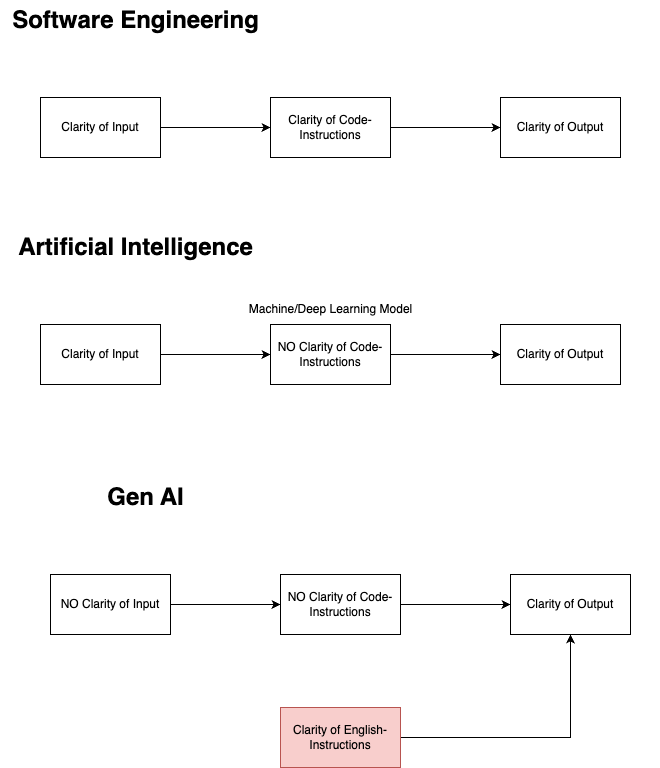

The YAML configuration files (`agents.yaml` and `tasks.yaml`) in CrewAI play a crucial role in separating instructions and configuration from the core Python code. This separation offers several key benefits:

**1. Declarative Configuration:**

* YAML files allow you to define the structure and behavior of your CrewAI agents and tasks in a declarative way. Instead of writing complex Python code to configure agents and tasks, you can simply define their properties and relationships in a structured YAML format.
* This makes the configuration more readable and easier to understand, especially for those who may not be familiar with Python programming.

**2. Separation of Concerns:**

* By separating the configuration from the code, you can modify the behavior of your CrewAI application without having to change the underlying Python code.
* For example, you can change the roles, goals, or tools of your agents by simply editing the `agents.yaml` file, without touching the `crew.py` or `main.py` files.
* Similarly, you can modify the steps, dependencies, or input parameters of your tasks by editing the `tasks.yaml` file.

**3. Enhanced Maintainability and Scalability:**

* The separation of configuration and code makes your CrewAI application more maintainable and scalable.
* When you need to update or modify your agents or tasks, you can simply update the YAML files, without having to worry about breaking the underlying code.
* This makes it easier to manage complex CrewAI applications with multiple agents and tasks.

**4. Dynamic Configuration:**

* YAML files can be easily loaded and parsed by Python code, allowing you to dynamically configure your CrewAI application at runtime.
* This means that you can change the behavior of your application based on user input, environment variables, or other dynamic factors.
* For example, you could load different agent configurations based on a user's chosen skill level, or load different task configurations based on the time of day.

**How it works in practice:**

* **`agents.yaml`**: This file typically defines the agents in your crew, including their roles, goals, backstories, tools, and LLM configurations.
    * For example, you might define an agent named "researcher" with the role "Conducting in-depth research", a goal "To gather accurate and up-to-date information", and a list of tools it can use.
* **`tasks.yaml`**: This file defines the tasks that the agents will perform, including their descriptions, dependencies, and input parameters.
    * For example, you might define a task named "write\_report" with the description "Write a comprehensive report based on the research findings", a dependency on the "research" task, and input parameters such as the report topic and target audience.
* The python code within `crew.py` will then read those yaml files, and use the information to create the agents and tasks. This allows the python code to be very generic, and the specific behavior of the code to be defined within the yaml files.

Let's look at the YAML files of `ai_latest_dev` example.


# Finally, let's run the Crew!

```bash
cd ai_latest_dev
crewai run  # runs "crewai install" as well, internally
```

# AgentOps

AgentOps, often referred to as AgenticOps, embodies the discipline of overseeing AI agents throughout their operational existence, from their initial conceptualization to their ongoing refinement . This practice is crucial for ensuring the dependability, clarity, and controlled behavior of these agents as they navigate complex and ever-changing environments. Microsoft's AutoGen project describes AgentOps as a system providing session replays, performance metrics, and comprehensive monitoring functionalities tailored for AI agents . From a broader perspective, AgentOps serves as a pivotal platform for the critical tasks of testing, debugging, and ultimately deploying AI agents and applications powered by large language models (LLMs).

At its core, AgentOps is guided by several fundamental principles that underpin its effectiveness in managing AI agents:

- **Observability:** This principle emphasizes the necessity of gaining profound insights into the internal workings of an AI agent, its interactions with its surroundings, and the intricate processes behind its decision-making . Achieving this requires a structured observability framework that includes detailed logging of agent actions, real-time dashboards that visualize key performance indicators, and seamless integration with existing monitoring systems . Such comprehensive visibility is essential for understanding the rationale behind an agent's behavior and for proactively identifying and addressing potential issues .
- **Traceability:** Traceability involves maintaining an exhaustive audit trail of every action an AI agent undertakes. This includes meticulously capturing the prompts that guide the agent, the configurations under which it operates, and the intermediate reasoning steps it employs . Robust traceability is paramount for establishing accountability and for thoroughly investigating the root causes of any errors or unintended behaviors that may arise . In industries subject to stringent regulations, this principle is not merely a best practice but a fundamental requirement for ensuring compliance.
- **Monitoring:** Continuous monitoring entails the systematic tracking of critical performance metrics, such as the time taken for an agent to respond (latency), the amount of computational resources it consumes, and the frequency of errors it encounters . Real-time monitoring capabilities enable timely intervention when anomalies are detected, thereby safeguarding the overall health and optimal performance of AI agents . Early detection of deviations from expected behavior can prevent minor issues from escalating into significant disruptions, ensuring the stability and reliability of the AI system.
- **Debugging:** AgentOps provides a suite of specialized tools and in-depth insights designed to facilitate the identification and resolution of problems in an AI agent's behavior. This includes uncovering flaws in the agent's reasoning processes and addressing unexpected interactions with other systems or users . A particularly valuable feature in this context is the provision of session replays, which allow developers to meticulously review the sequence of actions and decisions made by an agent, aiding in the pinpointing of errors . Given the probabilistic nature of LLMs, debugging AI agents often presents unique challenges compared to traditional software debugging.


The significance of AgentOps extends throughout the entire lifecycle of an AI agent. It is not limited to the post-deployment phase but is an integral component from the initial design and development stages through to deployment, ongoing monitoring, and continuous refinement . By emphasizing continuous improvement through the establishment of feedback loops where human experts can review agent outputs and provide corrective input, AgentOps ensures that AI agents can learn from their experiences and adapt to changing conditions . Incorporating AgentOps principles early in the development process enables the creation of more resilient and manageable AI agent systems.



#### Step 1: Create your API Key
Create your API key [here](https://app.agentops.ai/account)

Create a new project.

#### Step 2: Export your API key to your environment
```bash
export AGENTOPS_API_KEY=c051812f-your-key
```
Or paste in your .env file.

#### Step 3: Install AgentOps
```bash
pip install agentops
pip install 'crewai[agentops]'
```

#### Step 4:
Add two lines to beginning of your ```main.py```
```python
import agentops
session = agentops.init(<INSERT YOUR API KEY HERE>)
```

In case of `ModuleNotFoundError: No module named 'agentops'`, try `uv add agentops`.
